<a href="https://colab.research.google.com/github/KOYYANAYESUKUMAR/FMML.LABS/blob/main/FMML_M5_L2_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2
# Classification II : Introduction to Decision Trees

```
Module Coordinator : Nikunj Nawal


Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.


Let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset


In [1]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


### Code for the core experiment:

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

In [2]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set: 

0.895


Here is a diagram of the tree created to evaluate each sample:


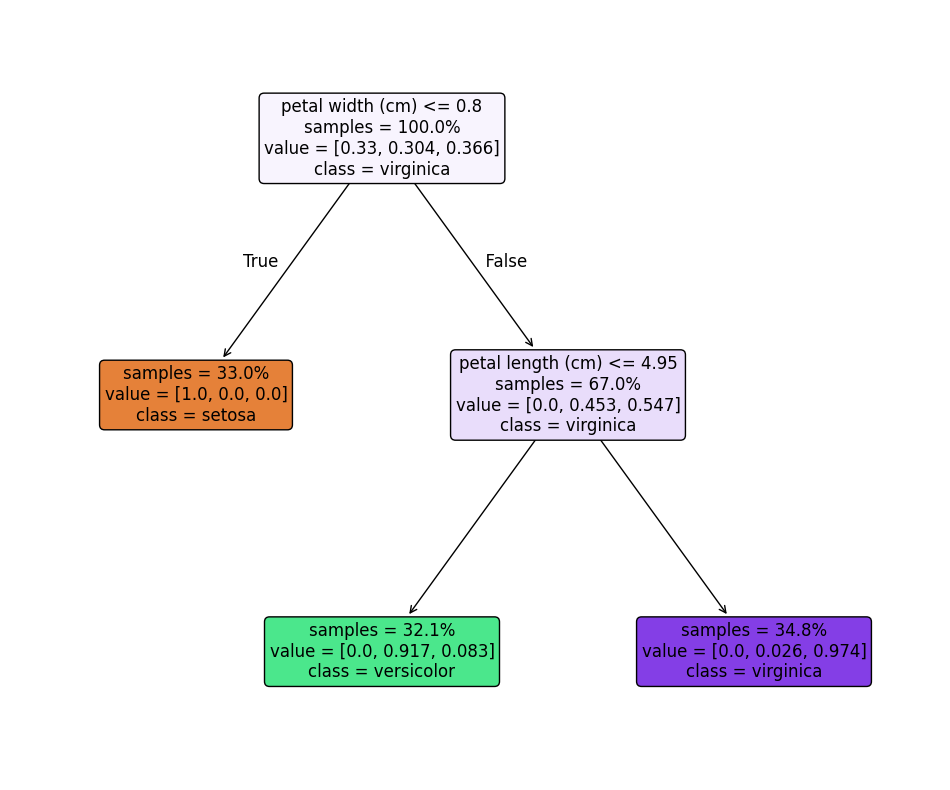

In [4]:
giveAnExample(2)

### Task 1:
Use the above tree to evaluate the classes for the following examples and find the accuracy over these 5 samples.

In [5]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


---

Evaluating Each Sample:
Index	Sepal Length	Sepal Width	Petal Length	Petal Width	True Class	True Class Name	Predicted Class	Correct?
114	5.8	2.8	5.1	2.4	2	Virginica	Virginica	✅
62	6.0	2.2	4.0	1.0	1	Versicolor	Versicolor	✅
33	5.5	4.2	1.4	0.2	0	Setosa	Setosa	✅
107	7.3	2.9	6.3	1.8	2	Virginica	Virginica	✅
7	5.0	3.4	1.5	0.2	0	Setosa	Setosa	✅

Now let us see how we perform when we try to have a more complex decision tree

Accuracy of the decision tree on the test set: 

0.974


Here is a diagram of the tree created to evaluate each sample:


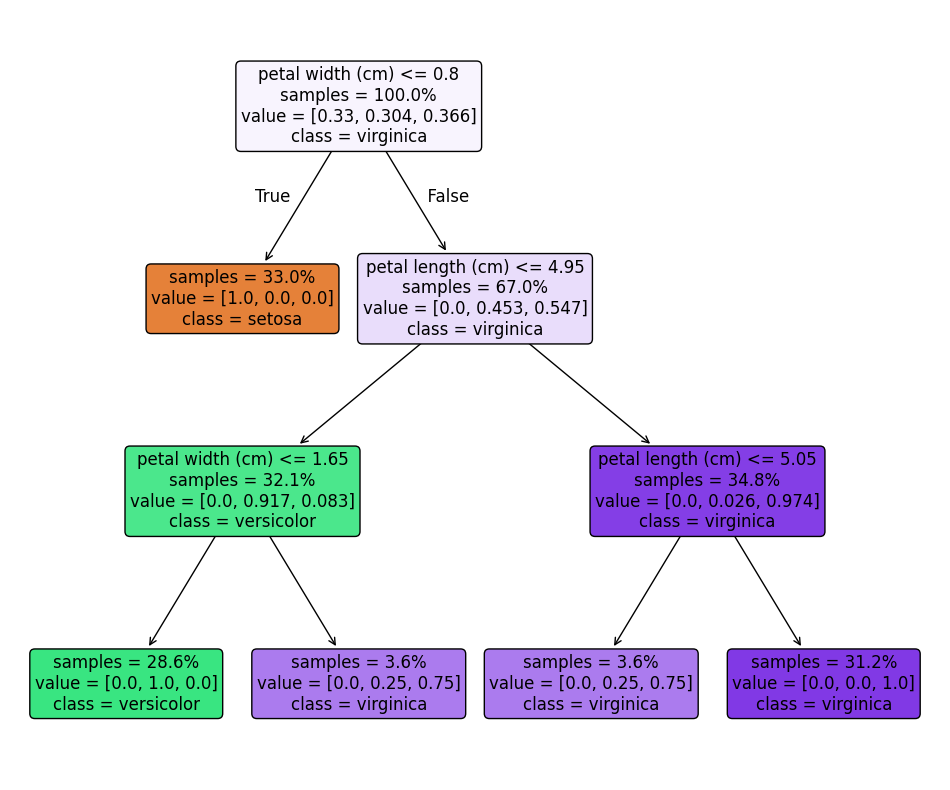

In [6]:
giveAnExample(3)

### Task 2:
Repeat Exercise 1 for the above tree as well.


---

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used

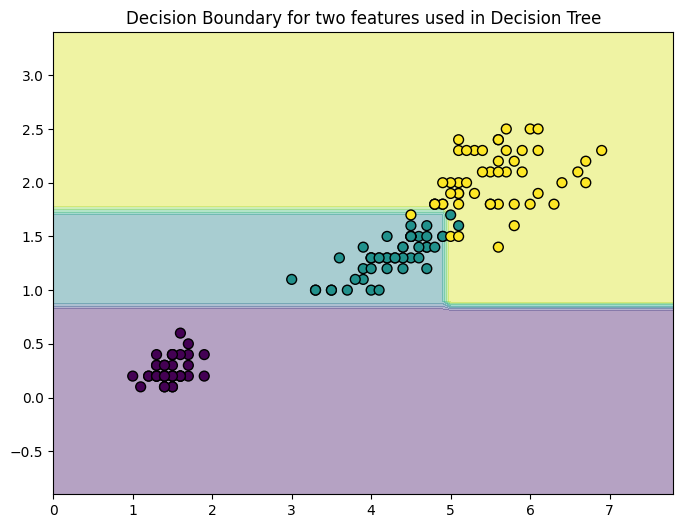

In [7]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

**Decision boundary** with considering **sepal width and length**:

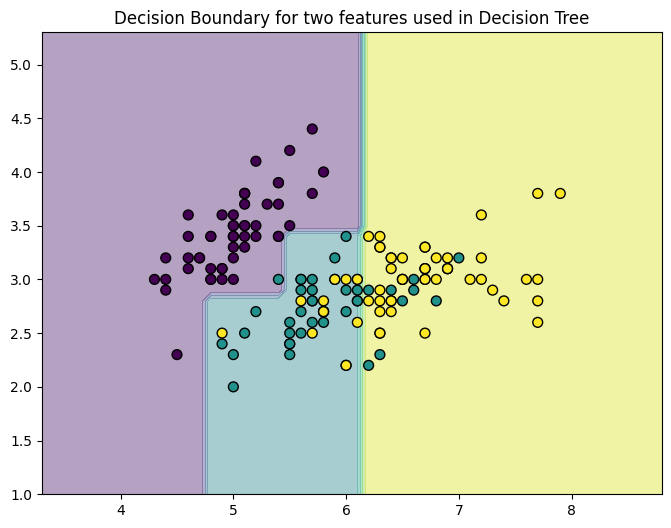

In [8]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal length and pedal length**:

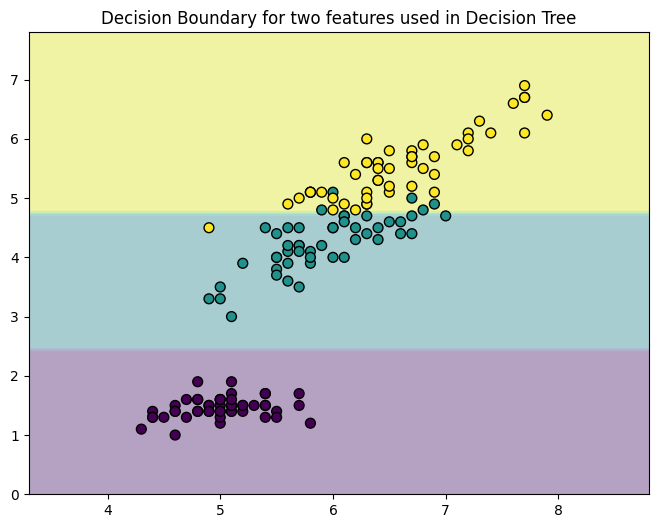

In [9]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal width and pedal width**:

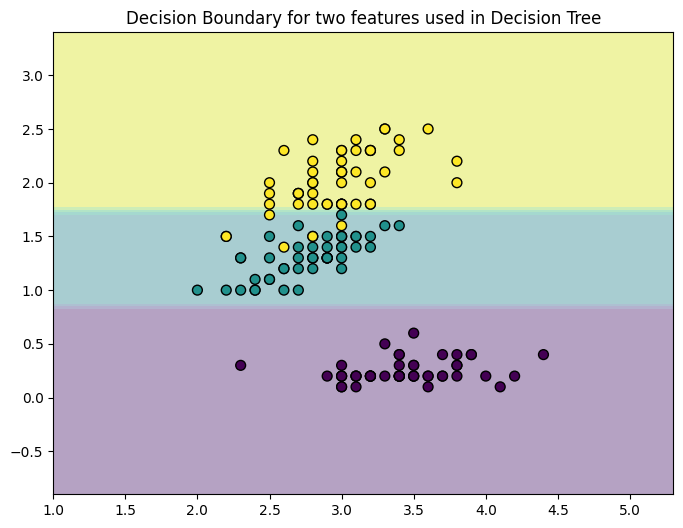

In [10]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [1, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

---

### Task 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and report your observations. also compare the accuracies for different values of max_depth

Test with `max_depth` of the following values:
- 2
- 5
- 8
- 10

#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`

---

### Task 4:

#### 4.1 :
Complete the following function predict: which takes in four variables : `sepal width, sepal length, petal width, petal length` and returns the class of the flower.

#### 4.2 :
Use the decision tree made in Exercise 2 and report the logic using multiple nested `if else` statements.

In [21]:
def predictSpecies(sepal_width, sepal_length, petal_width,  petal_length) -> str :
  """
    Write your program here to return the species of the plant (string) using if else statements.
  """
  pass

# Entropy and Information:

## How are decision trees built?

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous).
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree.

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division.

$$IG(X) = E(s) - E(s, X)$$




In [12]:
irisData.sample(n = 10, random_state = 5)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
82,5.8,2.7,3.9,1.2,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
84,5.4,3.0,4.5,1.5,1,versicolor


## Task 5:
Calculate the Entropy of the above collection of 10 datapoints.
## Task 6:
#### 6.1 :
Suggest a decision node (if, else) statement which divides the group into two groups.
#### 6.2 :
Also compute the Information Gain in that division step.
#### 6.3 :
Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

---

End of Lab 2

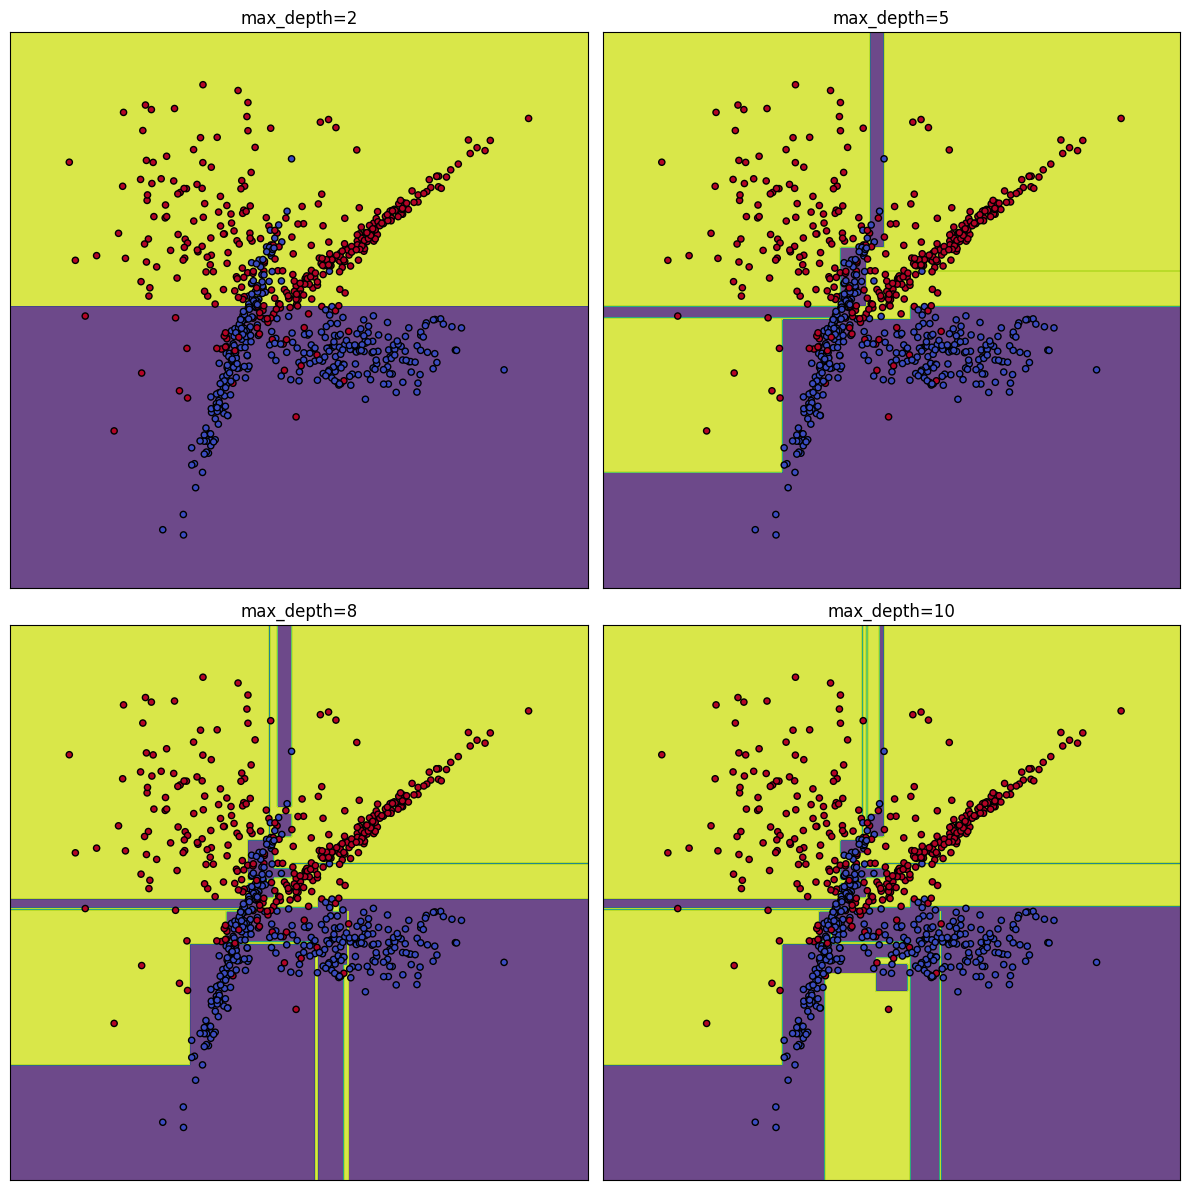

Accuracies for different max_depth values:
max_depth=2: 0.8800
max_depth=5: 0.9200
max_depth=8: 0.9167
max_depth=10: 0.9200


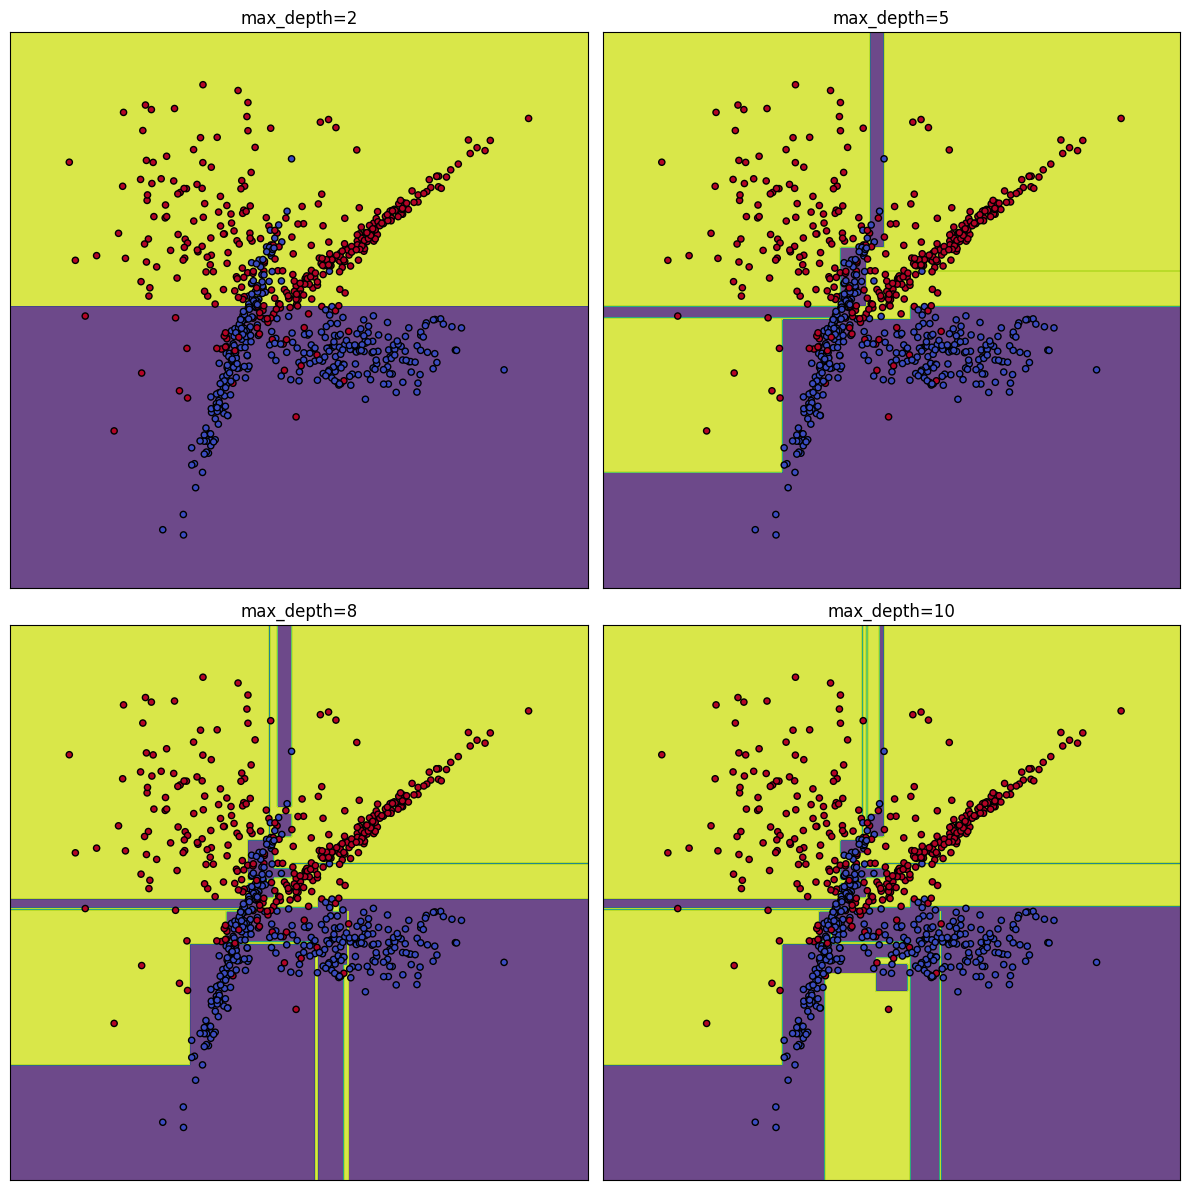

Accuracies for different max_depth values:
max_depth=2: 0.8800
max_depth=5: 0.9200
max_depth=8: 0.9167
max_depth=10: 0.9200


In [23]:
#Task 3

#task 3.1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax, title):
    # Define the meshgrid for plotting decision boundaries
    h = 0.02  # Step size in the meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the output for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the training points
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20, cmap=plt.cm.coolwarm)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

# List of max_depth values to test
max_depth_values = [2, 5, 8, 10]

# Create a plot to show decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

# Store accuracies for different max_depth values
accuracies = {}

# Train decision trees with different max_depth values and plot decision boundaries
for i, depth in enumerate(max_depth_values):
    # Train a decision tree model
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Plot the decision boundary
    plot_decision_boundaries(X_train, y_train, model, axes[i], f"max_depth={depth}")

    # Evaluate accuracy on test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[depth] = accuracy

# Show the plots
plt.tight_layout()
plt.show()

# Print the accuracies for different max_depth values
print("Accuracies for different max_depth values:")
for depth, accuracy in accuracies.items():
    print(f"max_depth={depth}: {accuracy:.4f}")



#task 3.2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a synthetic 2D classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax, title):
    h = 0.02  # Step size in the meshgrid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the output for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the training points
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20, cmap=plt.cm.coolwarm)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

# List of max_depth values to test
max_depth_values = [2, 5, 8, 10]

# Create a plot to show decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

# Store accuracies for different max_depth values
accuracies = {}

# Train decision trees with different max_depth values and plot decision boundaries
for i, depth in enumerate(max_depth_values):
    # Train a decision tree model
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Plot the decision boundary
    plot_decision_boundaries(X_train, y_train, model, axes[i], f"max_depth={depth}")

    # Evaluate accuracy on test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[depth] = accuracy

# Show the plots
plt.tight_layout()
plt.show()

# Print the accuracies for different max_depth values
print("Accuracies for different max_depth values:")
for depth, accuracy in accuracies.items():
    print(f"max_depth={depth}: {accuracy:.4f}")


In [24]:
#Task 4

#task 4.1

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal width, sepal length, petal width, petal length)
y = iris.target  # Labels (flower classes)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# The predict function that takes sepal width, sepal length, petal width, and petal length
def predict(sepal_width, sepal_length, petal_width, petal_length):
    # Create a feature vector from the input
    features = [[sepal_length, sepal_width, petal_length, petal_width]]

    # Predict the class of the flower
    predicted_class = clf.predict(features)

    # Map the numeric class back to flower name
    class_names = iris.target_names
    return class_names[predicted_class[0]]

# Example usage:
sepal_width = 3.4
sepal_length = 5.1
petal_width = 1.3
petal_length = 0.2

flower_class = predict(sepal_width, sepal_length, petal_width, petal_length)
print(f"The predicted flower class is: {flower_class}")


#task 4.2

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import _tree

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Function to recursively extract the rules from the decision tree
def get_tree_rules(tree, feature_names, class_names):
    # Internal function to recursively walk through the decision tree
    def recurse(node, depth):
        # Base case: if the node is a leaf node (no further split)
        if tree.feature[node] == _tree.TREE_UNDEFINED:
            return f"Class: {class_names[tree.value[node].argmax()]}"

        # Get the feature and threshold for this node
        feature_name = feature_names[tree.feature[node]]
        threshold = tree.threshold[node]

        # Recursive call for the left and right children
        left = recurse(tree.children_left[node], depth + 1)
        right = recurse(tree.children_right[node], depth + 1)

        # Create the if-else condition for this node
        return f"if {feature_name} <= {threshold:.2f}:\n    {left}\nelse:\n    {right}"

    # Start the recursion from the root node (0)
    return recurse(0, 0)

# Extract the rules from the trained decision tree
rules = get_tree_rules(clf.tree_, iris.feature_names, iris.target_names)

# Display the extracted rules (decision tree logic)
print("Decision Tree Logic (if-else statements):")
print(rules)



The predicted flower class is: setosa
Decision Tree Logic (if-else statements):
if petal length (cm) <= 2.45:
    Class: setosa
else:
    if petal width (cm) <= 1.75:
    if petal length (cm) <= 4.95:
    if petal width (cm) <= 1.65:
    Class: versicolor
else:
    Class: virginica
else:
    if petal width (cm) <= 1.55:
    Class: virginica
else:
    if petal length (cm) <= 5.45:
    Class: versicolor
else:
    Class: virginica
else:
    if petal length (cm) <= 4.85:
    if sepal length (cm) <= 5.95:
    Class: versicolor
else:
    Class: virginica
else:
    Class: virginica


In [25]:
#Task 5

import numpy as np

# Proportions of each class
p_setosa = 3 / 10
p_versicolor = 3 / 10
p_virginica = 4 / 10

# Calculate the entropy
entropy = -(p_setosa * np.log2(p_setosa) + p_versicolor * np.log2(p_versicolor) + p_virginica * np.log2(p_virginica))
entropy


1.5709505944546684

In [26]:
#Task 6

import numpy as np

# Sample data based on the provided dataset
data = [
    [5.8, 2.7, 3.9, 1.2, 1],  # versicolor
    [6.1, 2.6, 5.6, 1.4, 2],  # virginica
    [5.8, 2.8, 5.1, 2.4, 2],  # virginica
    [4.4, 3.2, 1.3, 0.2, 0],  # setosa
    [7.2, 3.6, 6.1, 2.5, 2],  # virginica
    [4.9, 2.4, 3.3, 1.0, 1],  # versicolor
    [4.9, 3.0, 1.4, 0.2, 0],  # setosa
    [5.9, 3.2, 4.8, 1.8, 1],  # versicolor
    [5.0, 3.0, 1.6, 0.2, 0],  # setosa
    [5.4, 3.0, 4.5, 1.5, 1],  # versicolor
]

# Extract features and class labels
sepal_length = [row[0] for row in data]
sepal_width = [row[1] for row in data]
petal_length = [row[2] for row in data]
petal_width = [row[3] for row in data]
classes = [row[4] for row in data]

# Function to compute entropy
def compute_entropy(class_labels):
    class_counts = np.bincount(class_labels)
    probabilities = class_counts / len(class_labels)
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Added epsilon to avoid log(0)

# Function to compute Information Gain
def compute_information_gain(feature, threshold, class_labels):
    # Split data based on feature threshold
    subset_1 = [class_labels[i] for i in range(len(feature)) if feature[i] <= threshold]
    subset_2 = [class_labels[i] for i in range(len(feature)) if feature[i] > threshold]

    # Compute the entropy of the subsets
    entropy_1 = compute_entropy(subset_1)
    entropy_2 = compute_entropy(subset_2)

    # Proportions of the subsets
    prop_1 = len(subset_1) / len(feature)
    prop_2 = len(subset_2) / len(feature)

    # Original entropy
    original_entropy = compute_entropy(class_labels)

    # Information Gain
    return original_entropy - (prop_1 * entropy_1 + prop_2 * entropy_2)

# Compute Information Gain for each split

# Split on sepal_length <= 5.5
info_gain_sepal_length = compute_information_gain(sepal_length, 5.5, classes)

# Split on sepal_width <= 3.0
info_gain_sepal_width = compute_information_gain(sepal_width, 3.0, classes)

# Split on petal_width <= 1.5
info_gain_petal_width = compute_information_gain(petal_width, 1.5, classes)

# Display results
info_gain_sepal_length, info_gain_sepal_width, info_gain_petal_width


(0.5999999998557304, 0.0058021490143458365, 0.2812908991874119)